In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import plotly.express as px
from bs4 import BeautifulSoup
import requests

In [102]:
df = pd.read_csv('StudentsPerformance (2).csv')

In [67]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [75]:
###PLOT A GRAPH SHOWING THE PARENTAL LEVEL OF EDUCATION AND SCORE IN THE MATH TEST FOR THE MALE STUDENTS IN THE GROUP A AT SOME COLLEGE WITH STANDARD LUNCH AND FREE/REDUCED.

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

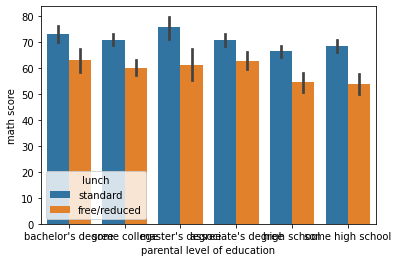

In [76]:
sns.barplot (y = df['math score'], x =df['parental level of education'], hue = df['lunch'])

In [77]:
###DETERMINE THE PERCENTAGE OF BOTH MALE AND FEMALE IN EACH GROUP

In [51]:
new_df = df.groupby('gender')['race/ethnicity'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()


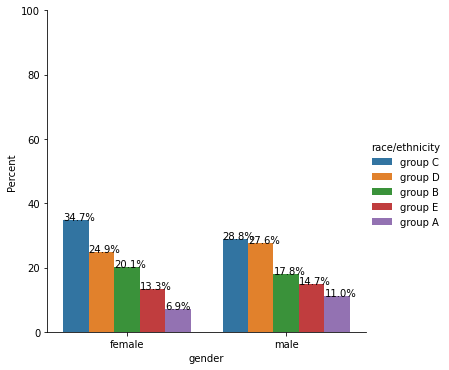

In [59]:
df = sns.catplot(x='gender', y='Percent', hue='race/ethnicity', kind='bar', data=new_df)
df.ax.set_ylim(0,100)

for p in df.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    df.ax.text(txt_x,txt_y,txt)

In [45]:
###PLOT A GRAPH SHOWING THE HIGHEST MATH SCORE OF BOTH GENDER IN ALL GROUPS

<AxesSubplot:xlabel='gender', ylabel='math score'>

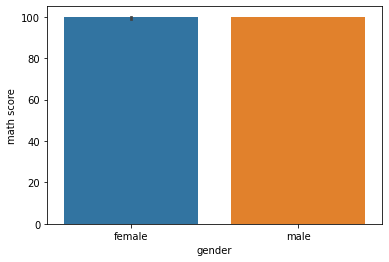

In [109]:
sns.barplot (y = df['math score'], x = df['gender'], estimator = max)

In [19]:
###
# DETERMINE THE AVERAGE NUMBER OF MALES AND FEMALES WHOSE PARENTAL LEVEL OF EDUCATION IS AT THE MASTER DEGREE

<AxesSubplot:xlabel='gender', ylabel='count'>

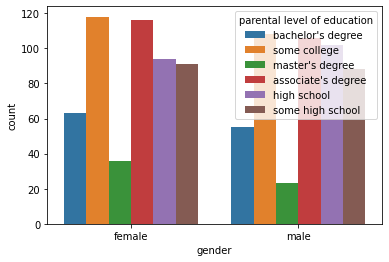

In [86]:
sns.countplot (x = df['gender'], hue = df['parental level of education'])

In [79]:
### PLOT A GRAPH TO SHOW THE HIGHEST AND LOWEST SCORES IN THE READING TEST IN DESCENDING ORDER

In [106]:
df['writing score']=df['writing score'].rank(ascending=0)
df['writing score']

0      368.0
1       93.0
2       44.5
3      934.5
4      339.5
       ...  
995     30.5
996    790.5
997    603.5
998    291.5
999    115.5
Name: writing score, Length: 1000, dtype: float64

In [80]:
###PLOT A GRAPH SHOWING THE HIGHEST AND LOWEST SCORES IN THE WRITING TEST  

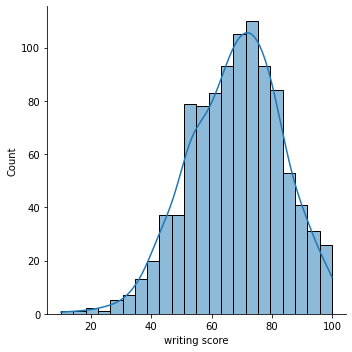

In [121]:
sns.displot(x=df['writing score'], kde=True)

In [4]:
###FIND OUT THE PERCENTAGE OF BOTH GENDER WHO HAD STANDARD AND FREE/REDUCED LUNCH

In [98]:
new_df1 = df.groupby('gender')['lunch'].value_counts(normalize=True)
new_df1 = new_df1.mul(100).rename('Percent').reset_index()

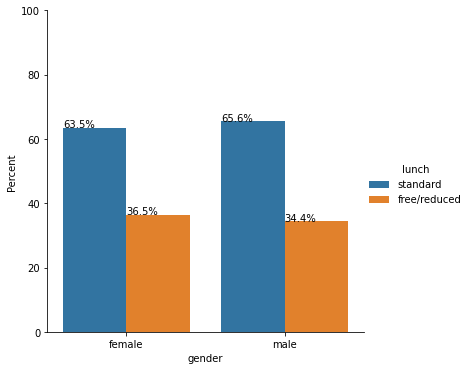

In [99]:
df = sns.catplot(x='gender', y='Percent', hue='lunch', kind='bar', data=new_df1)
df.ax.set_ylim(0,100)

for p in df.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    df.ax.text(txt_x,txt_y,txt)